In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import shapiro, kruskal

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score

In [ ]:
df=pd.read_csv('loan_approval_dataset.csv')

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,2,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [ ]:
df.shape

(4289, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4289 entries, 0 to 4288
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4289 non-null   int64  
 1    no_of_dependents          4289 non-null   float64
 2    education                 4289 non-null   object 
 3    self_employed             4289 non-null   object 
 4    income_annum              4289 non-null   float64
 5    loan_amount               4289 non-null   float64
 6    loan_term                 4289 non-null   float64
 7    cibil_score               4289 non-null   float64
 8    residential_assets_value  4289 non-null   float64
 9    commercial_assets_value   4289 non-null   float64
 10   luxury_assets_value       4289 non-null   float64
 11   bank_asset_value          4289 non-null   float64
 12   loan_status               4289 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage:

In [ ]:
df.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().round(1)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4289.0,4289.0,4289.0,4289.0,4289.0,4289.0,4289.0,4289.0,4289.0,4289.0
mean,2145.5,2.5,5038773.6,15064385.6,10.9,600.6,7438957.8,4950419.7,15055857.3,4955438.3
std,1239.1,1.7,2816086.7,9078517.1,5.7,172.3,6507071.0,4391304.8,9140644.0,3257490.2
min,1.0,0.0,200000.0,120000.0,2.0,300.0,-100000.0,0.0,5000.0,0.0
25%,1073.0,1.0,2600000.0,7600000.0,6.0,454.0,2100000.0,1300000.0,7400000.0,2300000.0
50%,2145.0,3.0,5100000.0,14500000.0,10.0,601.0,5500000.0,3700000.0,14500000.0,4500000.0
75%,3217.0,4.0,7500000.0,21400000.0,16.0,748.0,11300000.0,7600000.0,21700000.0,7100000.0
max,4389.0,5.0,9900000.0,39500000.0,30.0,900.0,29100000.0,19400000.0,39200000.0,14700000.0


In [ ]:
df.corr(numeric_only=True)

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.001063,-0.000606,-0.005662,0.021540,0.022912,0.011388,0.009063,-0.014749,-0.001133
no_of_dependents,0.001063,1.000000,0.010728,0.000443,-0.024068,-0.012012,0.009895,0.001035,0.006633,0.014232
income_annum,-0.000606,0.010728,1.000000,0.928295,0.001180,-0.028551,0.639446,0.642904,0.929946,0.852551
loan_amount,-0.005662,0.000443,0.928295,1.000000,-0.002375,-0.022956,0.597623,0.606142,0.862654,0.790260
loan_term,0.021540,-0.024068,0.001180,-0.002375,1.000000,0.013075,0.000658,-0.012695,0.001490,0.007778
cibil_score,0.022912,-0.012012,-0.028551,-0.022956,0.013075,1.000000,-0.023966,-0.007870,-0.034537,-0.020514
residential_assets_value,0.011388,0.009895,0.639446,0.597623,0.000658,-0.023966,1.000000,0.418133,0.594005,0.530718
commercial_assets_value,0.009063,0.001035,0.642904,0.606142,-0.012695,-0.007870,0.418133,1.000000,0.594203,0.551720
luxury_assets_value,-0.014749,0.006633,0.929946,0.862654,0.001490,-0.034537,0.594005,0.594203,1.000000,0.790655
bank_asset_value,-0.001133,0.014232,0.852551,0.790260,0.007778,-0.020514,0.530718,0.551720,0.790655,1.000000


In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,2,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [ ]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
#To remove the trailing whitespace
df.columns=df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,2,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


## EDA

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,2,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,4,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


In [ ]:
df.drop(columns=['loan_id'],inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


#### Loan Status

In [ ]:
df['loan_status'].unique()

array([' Approved', ' Rejected', 'Approved', 'Rejected'], dtype=object)

In [ ]:
df['loan_status']=df['loan_status'].apply(lambda x: x.strip())
df['loan_status'].unique()

array(['Approved', 'Rejected'], dtype=object)

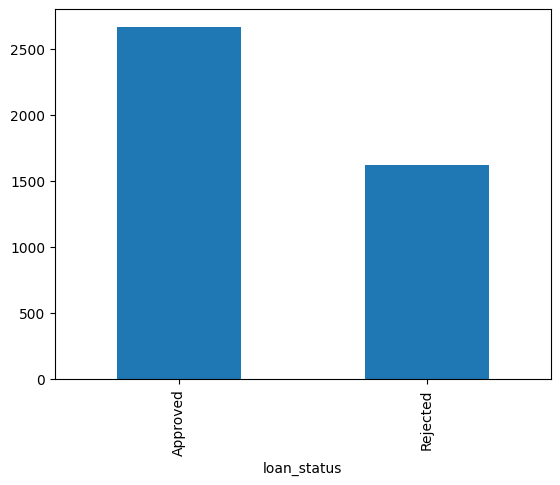

In [ ]:
df['loan_status'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
approved_count=df['loan_status'].value_counts()['Approved']
reject_count=df['loan_status'].value_counts()['Rejected']

In [ ]:
approved_count, reject_count

(2669, 1620)

#### Number of Dependents

In [ ]:
df['no_of_dependents'].unique()

array([2., 0., 3., 5., 4., 1.])

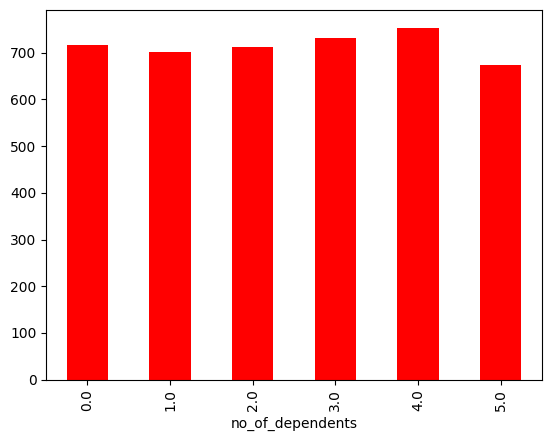

In [ ]:
df['no_of_dependents'].value_counts().sort_index().plot(kind='bar',color='red')
plt.show()

In [ ]:
new=pd.crosstab(df['no_of_dependents'],df['loan_status'])
new

loan_status,Approved,Rejected
no_of_dependents,,
0.0,461,256
1.0,432,270
2.0,445,267
3.0,459,272
4.0,466,288
5.0,406,267


In [ ]:
new['Approved']=new['Approved']/approved_count
new['Rejected']=new['Rejected']/reject_count
new

loan_status,Approved,Rejected
no_of_dependents,,
0.0,0.172724,0.158025
1.0,0.161858,0.166667
2.0,0.166729,0.164815
3.0,0.171975,0.167901
4.0,0.174597,0.177778
5.0,0.152117,0.164815


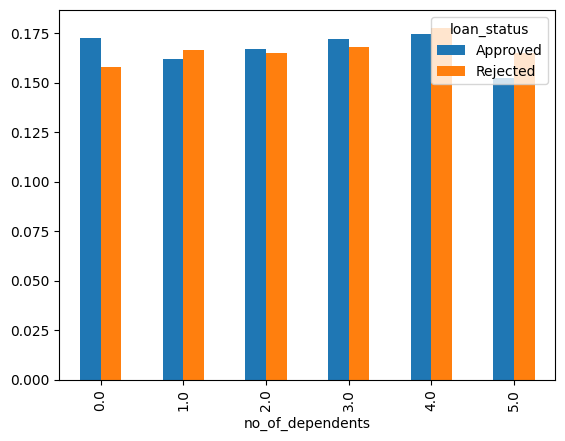

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df['no_of_dependents'],df['loan_status']))

Chi2ContingencyResult(statistic=2.6596476668745366, pvalue=0.7522828888000967, dof=5, expected_freq=array([[446.18162742, 270.81837258],
       [436.84728375, 265.15271625],
       [443.07017953, 268.92982047],
       [454.89368151, 276.10631849],
       [469.2063418 , 284.7936582 ],
       [418.80088599, 254.19911401]]))

#### Education

In [ ]:
df['education'].unique()
df['education']=df['education'].apply(lambda x: x.strip())
df['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

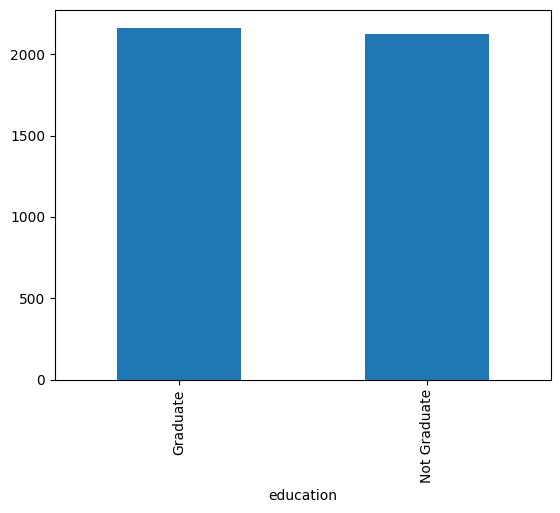

In [ ]:
df['education'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
new=pd.crosstab(df['education'],df['loan_status'])
new

loan_status,Approved,Rejected
education,,
Graduate,1352,812
Not Graduate,1317,808


In [ ]:
new['Approved']=new['Approved']/approved_count
new['Rejected']=new['Rejected']/reject_count
new

loan_status,Approved,Rejected
education,,
Graduate,0.506557,0.501235
Not Graduate,0.493443,0.498765


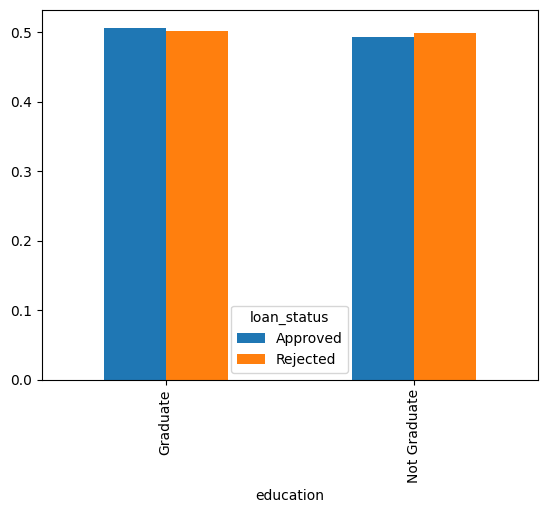

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df['education'],df['loan_status']))

Chi2ContingencyResult(statistic=0.09393276609010409, pvalue=0.7592357580536221, dof=1, expected_freq=array([[1346.63464677,  817.36535323],
       [1322.36535323,  802.63464677]]))

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


#### Self employment

In [ ]:
df['self_employed'].unique()
df['self_employed']=df['self_employed'].apply(lambda x: x.strip())
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

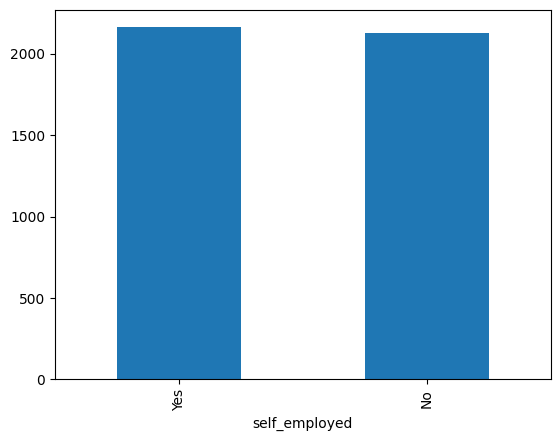

In [ ]:
df['self_employed'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
new=pd.crosstab(df['self_employed'],df['loan_status'])
new

loan_status,Approved,Rejected
self_employed,,
No,1323,804
Yes,1346,816


In [ ]:
new['Approved']=new['Approved']/approved_count
new['Rejected']=new['Rejected']/reject_count
new

loan_status,Approved,Rejected
self_employed,,
No,0.495691,0.496296
Yes,0.504309,0.503704


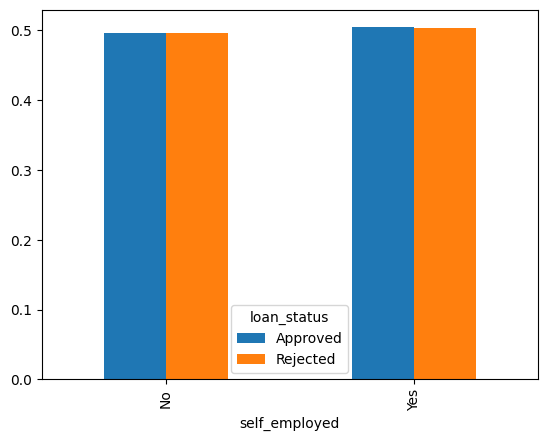

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df['self_employed'],df['loan_status']))

Chi2ContingencyResult(statistic=4.795486497895783e-05, pvalue=0.9944747373612336, dof=1, expected_freq=array([[1323.60993239,  803.39006761],
       [1345.39006761,  816.60993239]]))

#### Annual Income

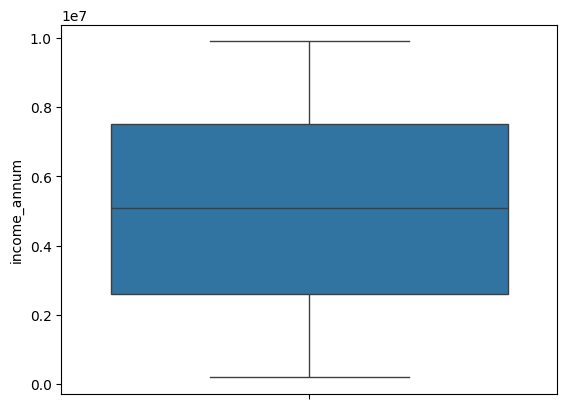

In [ ]:
sns.boxplot(y=df['income_annum'])
plt.show()

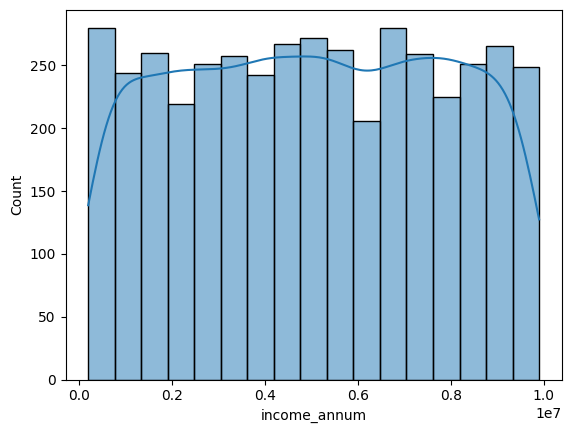

In [ ]:
sns.histplot(df['income_annum'],kde=True)
plt.show()

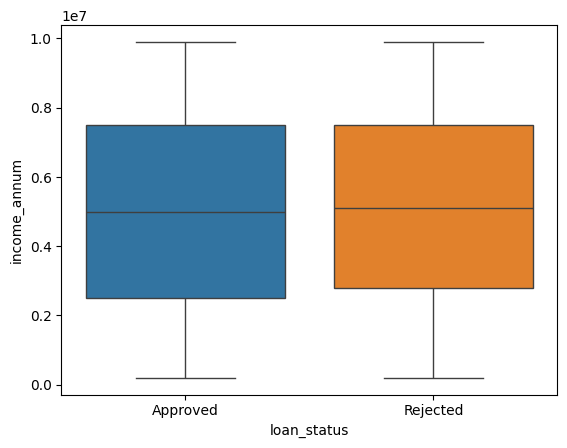

In [ ]:
sns.boxplot(y=df['income_annum'],x=df['loan_status'],hue=df['loan_status'])
plt.show()

In [ ]:
model = ols('income_annum ~ C(loan_status)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(loan_status),1.0,7.934591e+12,7.934591e+12,1.000536,0.317237
Residual,4287.0,3.399738e+16,7.930343e+12,NaN,NaN


In [ ]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['loan_status'].unique():
  group_data=df[df['loan_status']==status]['income_annum']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for Approved: p-value = 2.205016830156788e-28
Normality Test for Rejected: p-value = 6.511833967276618e-21


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['income_annum'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.32064396528472217


####Loan Amount

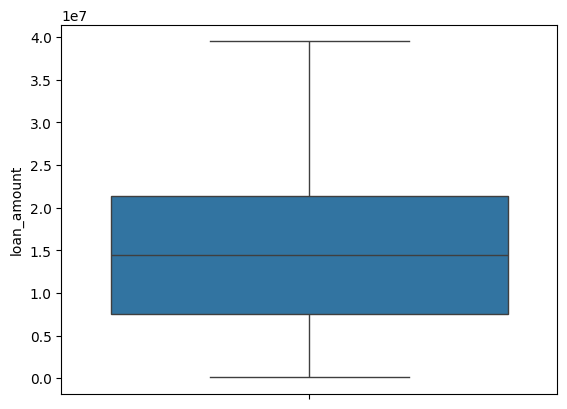

In [ ]:
sns.boxplot(y=df['loan_amount'])
plt.show()

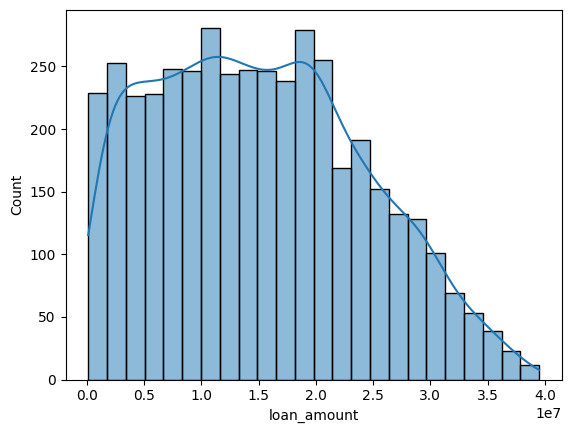

In [ ]:
sns.histplot(df['loan_amount'],kde=True)
plt.show()

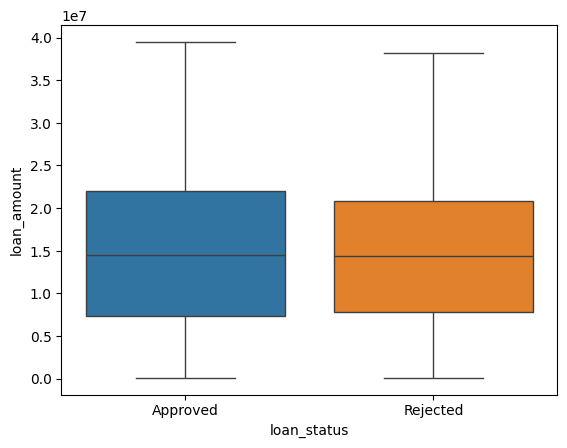

In [ ]:
sns.boxplot(y=df['loan_amount'],x=df['loan_status'],hue=df['loan_status'])
plt.show()

In [ ]:
model = ols('loan_amount ~ C(loan_status)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(loan_status),1.0,8.609380e+13,8.609380e+13,1.044592,0.306814
Residual,4287.0,3.533286e+17,8.241862e+13,NaN,NaN


In [ ]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['loan_status'].unique():
  group_data=df[df['loan_status']==status]['loan_amount']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for Approved: p-value = 1.639294922571394e-23
Normality Test for Rejected: p-value = 7.50123058830687e-16


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['loan_amount'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.4326236469924324


In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,Graduate,No,9600000.0,29900000.0,12.0,778.0,2400000.0,17600000.0,22700000.0,8000000.0,Approved
1,0.0,Not Graduate,Yes,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,Rejected
2,3.0,Graduate,No,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,Rejected
3,3.0,Graduate,No,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,Rejected
4,5.0,Not Graduate,Yes,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,Rejected


Debt-to-income ratio

In [ ]:
df['debt_to_income']=df['loan_amount']/df['income_annum']

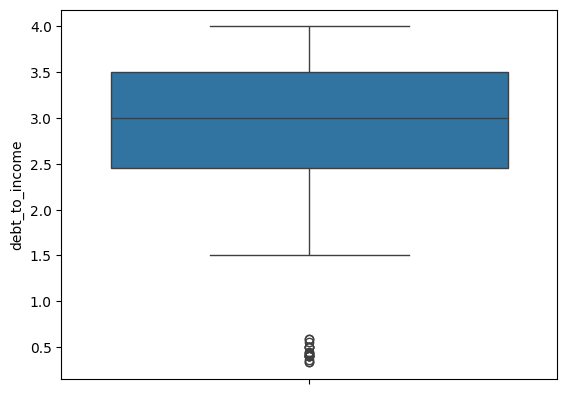

In [ ]:
sns.boxplot(df['debt_to_income'])
plt.show()

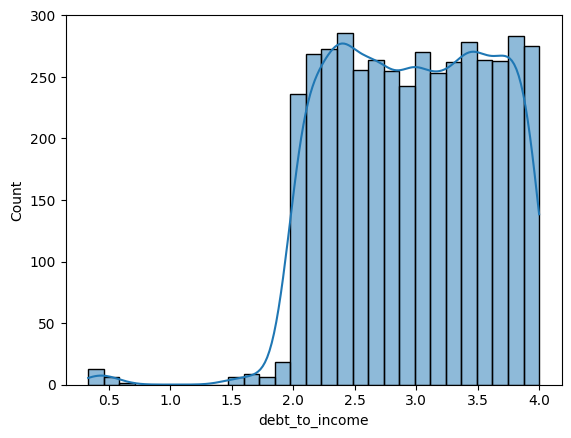

In [ ]:
sns.histplot(df['debt_to_income'],kde=True)
plt.show()

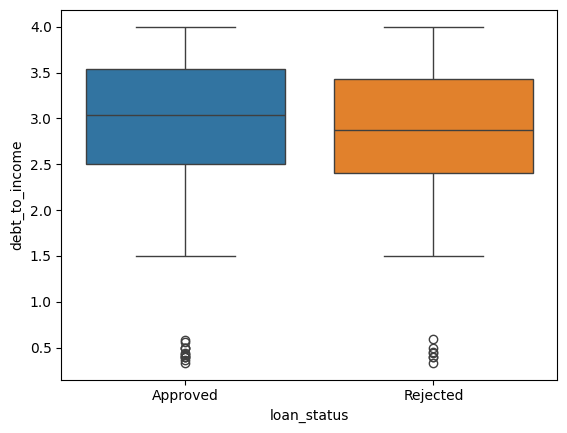

In [ ]:
sns.boxplot(y=df['debt_to_income'],x=df['loan_status'],hue=df['loan_status'])
plt.show()

In [ ]:
model = ols('debt_to_income ~ C(loan_status)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(loan_status),1.0,11.297981,11.297981,29.704101,5.315386e-08
Residual,4287.0,1630.564215,0.380351,NaN,NaN


In [ ]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['loan_status'].unique():
  group_data=df[df['loan_status']==status]['debt_to_income']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for Approved: p-value = 3.963160913710546e-28
Normality Test for Rejected: p-value = 3.1961018444270465e-20


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['debt_to_income'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 2.1155873285442477e-08


Loan Term

In [ ]:
df['loan_term'].unique()

array([12.,  8., 20., 10.,  4.,  2., 18., 16., 14.,  6., 15., 25., 30.])

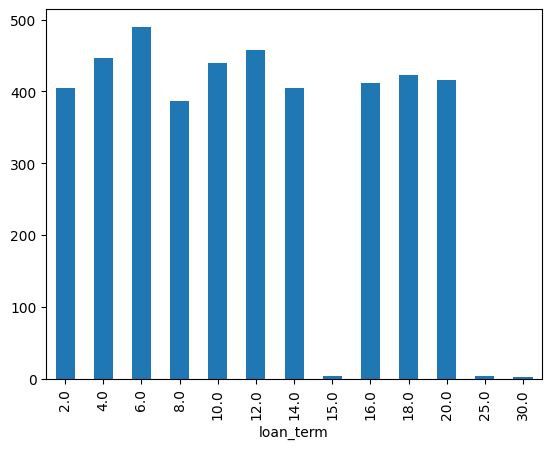

In [ ]:
df['loan_term'].value_counts().sort_index().plot(kind='bar')
plt.show()

In [ ]:
new=pd.crosstab(df['loan_term'],df['loan_status'])
new

loan_status,Approved,Rejected
loan_term,,
2.0,315,89
4.0,366,81
6.0,282,208
8.0,220,166
10.0,231,208
12.0,277,180
14.0,239,166
15.0,3,1
16.0,236,176


In [ ]:
new['Approved']=new['Approved']/approved_count
new['Rejected']=new['Rejected']/reject_count
new

loan_status,Approved,Rejected
loan_term,,
2.0,0.118022,0.054938
4.0,0.137130,0.050000
6.0,0.105658,0.128395
8.0,0.082428,0.102469
10.0,0.086549,0.128395
12.0,0.103784,0.111111
14.0,0.089547,0.102469
15.0,0.001124,0.000617
16.0,0.088423,0.108642


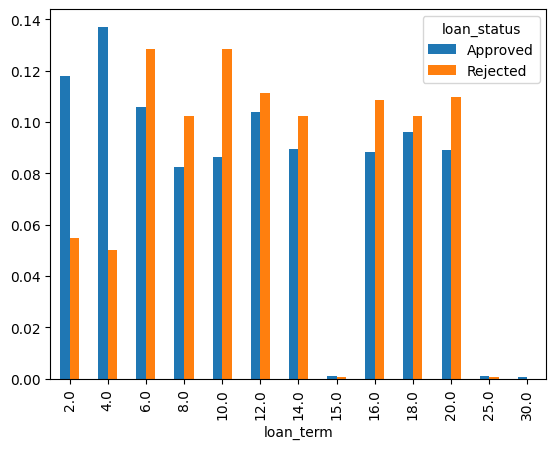

In [ ]:
new.plot(kind='bar')
plt.show()

In [ ]:
chi2_contingency(pd.crosstab(df['loan_term'],df['loan_status']))

Chi2ContingencyResult(statistic=155.52720798795576, pvalue=4.274253733794403e-27, dof=12, expected_freq=array([[251.40498951, 152.59501049],
       [278.16344136, 168.83655864],
       [304.92189322, 185.07810678],
       [240.2037771 , 145.7962229 ],
       [273.18512474, 165.81487526],
       [284.38633714, 172.61366286],
       [252.02727909, 152.97272091],
       [  2.48915831,   1.51084169],
       [256.38330613, 155.61669387],
       [263.22849149, 159.77150851],
       [258.87246444, 157.12753556],
       [  2.48915831,   1.51084169],
       [  1.24457916,   0.75542084]]))

Cibil Score

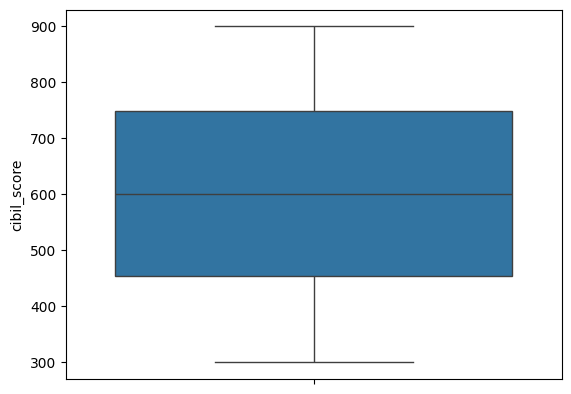

In [ ]:
sns.boxplot(y=df['cibil_score'])
plt.show()

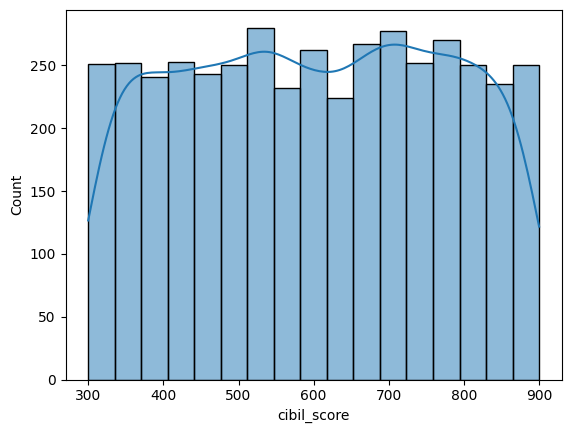

In [ ]:
sns.histplot(df['cibil_score'],kde=True)
plt.show()

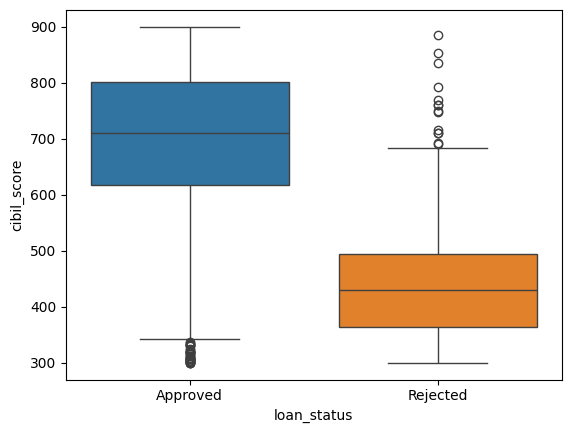

In [ ]:
sns.boxplot(y=df['cibil_score'],x=df['loan_status'],hue=df['loan_status'])
plt.show()

In [ ]:
model = ols('cibil_score ~ C(loan_status)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(loan_status),1.0,7.512167e+07,7.512167e+07,6171.677434,0.0
Residual,4287.0,5.218137e+07,1.217200e+04,NaN,NaN


In [ ]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['loan_status'].unique():
  group_data=df[df['loan_status']==status]['cibil_score']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for Approved: p-value = 7.098439863324031e-27
Normality Test for Rejected: p-value = 3.612891192524915e-24


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['cibil_score'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.0


### Assets

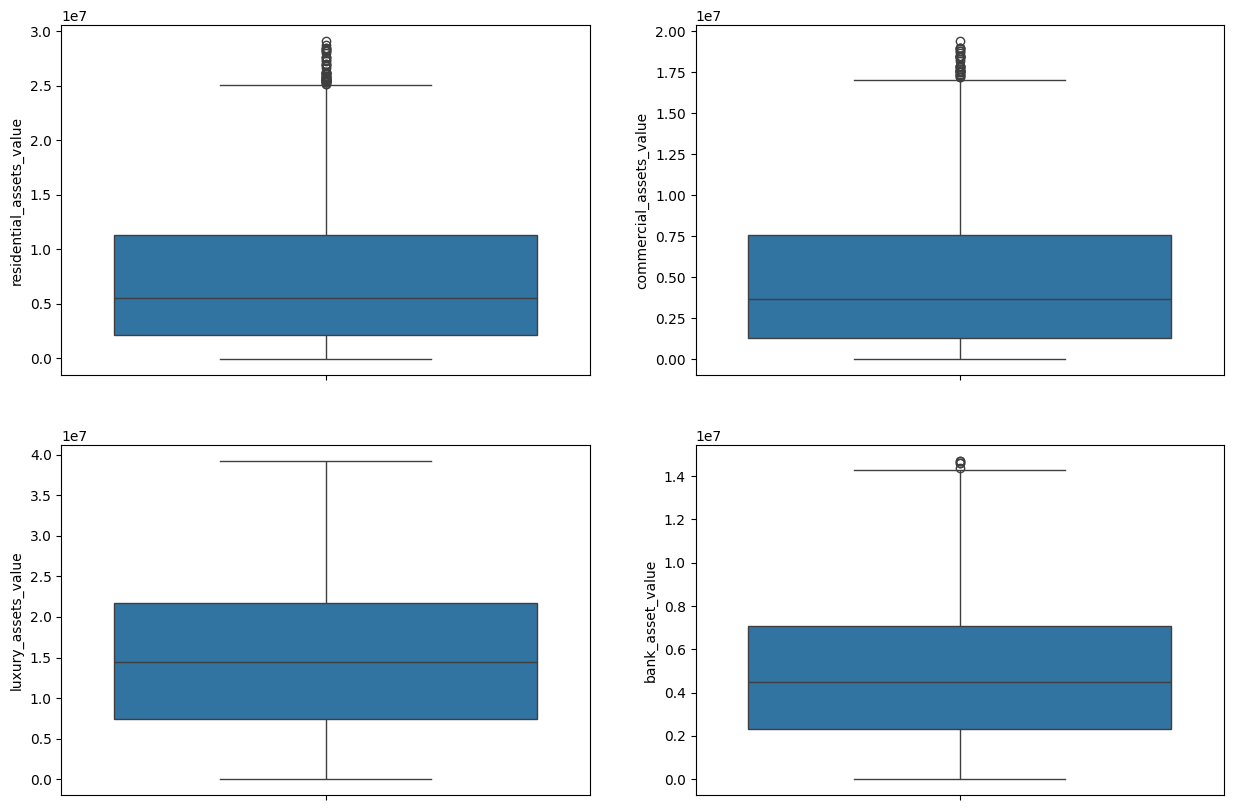

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.boxplot(df['residential_assets_value'],ax=ax[0,0])

sns.boxplot(df['commercial_assets_value'],ax=ax[0,1])

sns.boxplot(df['luxury_assets_value'],ax=ax[1,0])

sns.boxplot(df['bank_asset_value'],ax=ax[1,1])
plt.show()

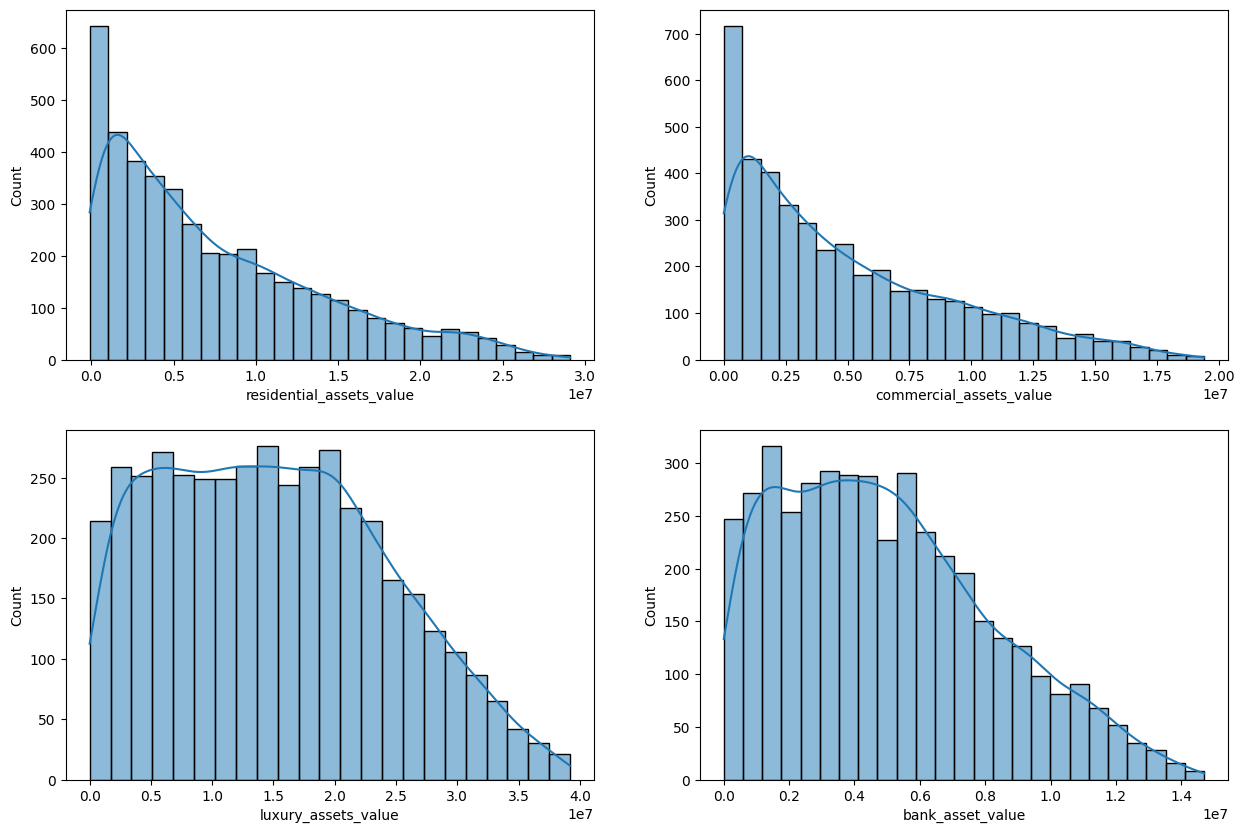

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.histplot(df['residential_assets_value'],kde=True,ax=ax[0,0])

sns.histplot(df['commercial_assets_value'],kde=True,ax=ax[0,1])

sns.histplot(df['luxury_assets_value'],kde=True,ax=ax[1,0])

sns.histplot(df['bank_asset_value'],kde=True,ax=ax[1,1])
plt.show()

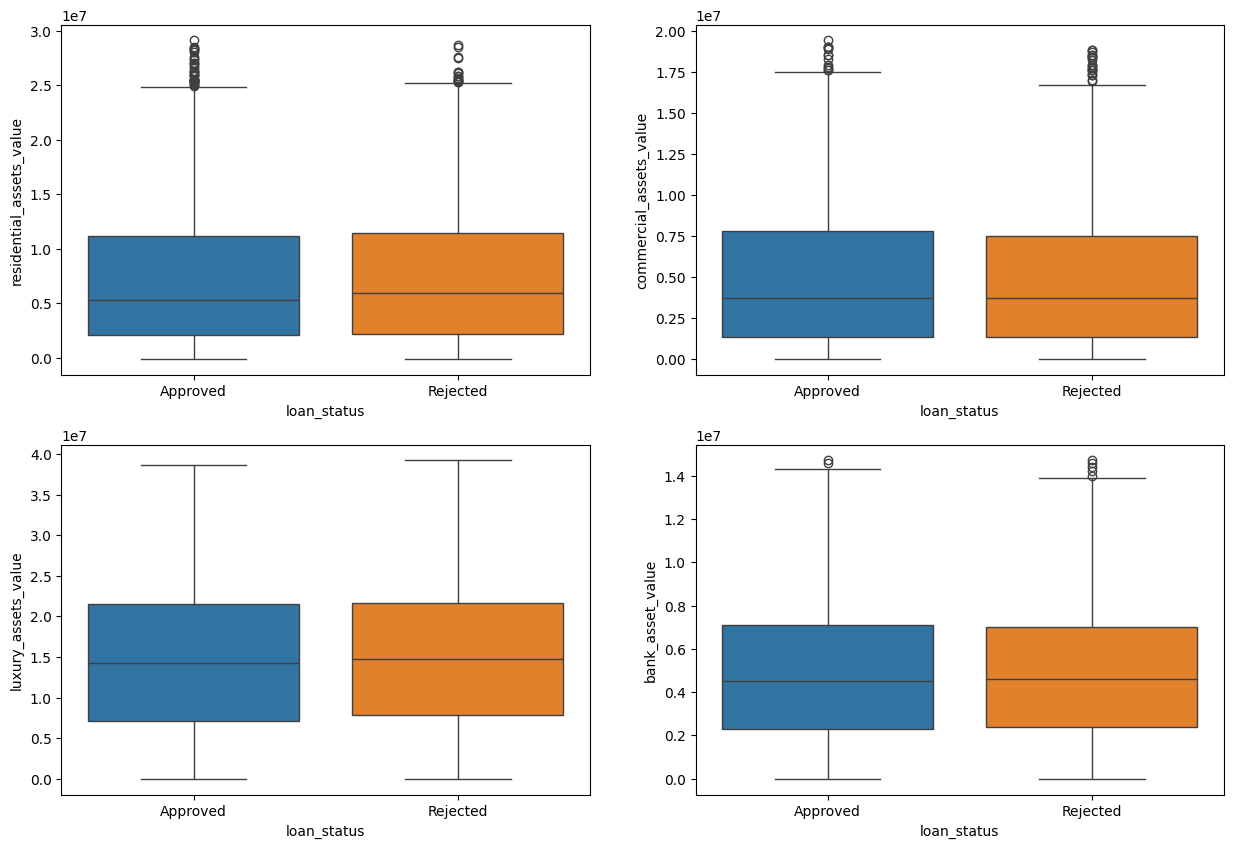

In [ ]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.boxplot(y=df['residential_assets_value'],x=df['loan_status'],hue=df['loan_status'],ax=ax[0,0])
sns.boxplot(y=df['commercial_assets_value'],x=df['loan_status'],hue=df['loan_status'],ax=ax[0,1])
sns.boxplot(y=df['luxury_assets_value'],x=df['loan_status'],hue=df['loan_status'],ax=ax[1,0])
sns.boxplot(y=df['bank_asset_value'],x=df['loan_status'],hue=df['loan_status'],ax=ax[1,1])
plt.show()



In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['residential_assets_value'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.2795495606658093


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['commercial_assets_value'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.5721865811238991


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['luxury_assets_value'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.25046010232566546


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['bank_asset_value'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.5088424174775446


Combined Asset value

In [ ]:
df['assets']=df['residential_assets_value']+df['commercial_assets_value']+df['luxury_assets_value']+df['bank_asset_value']

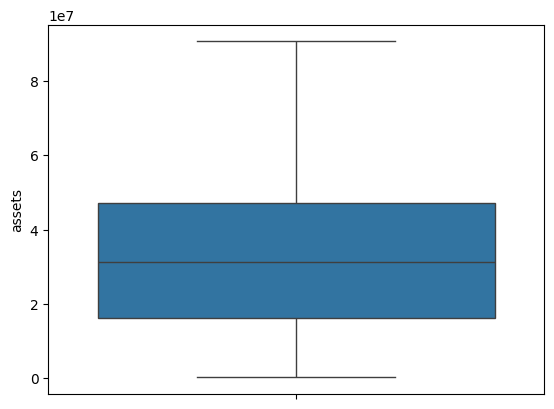

In [ ]:
sns.boxplot(df['assets'])
plt.show()

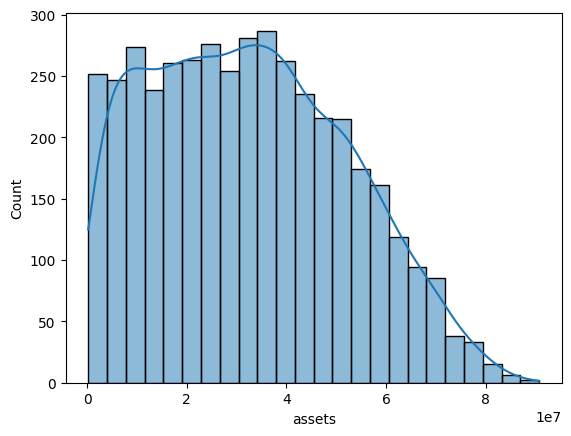

In [ ]:
sns.histplot(df['assets'],kde=True)
plt.show()

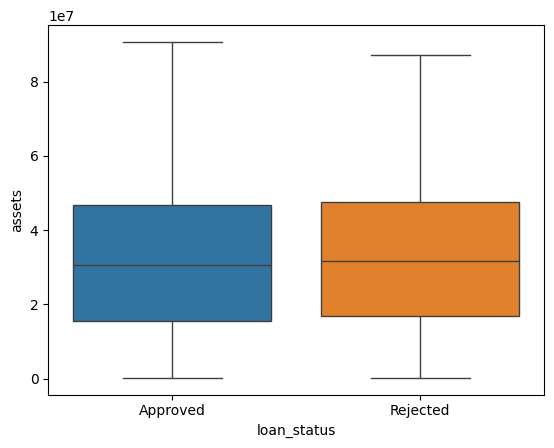

In [ ]:
sns.boxplot(y=df['assets'],x=df['loan_status'],hue=df['loan_status'])
plt.show()

In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['assets'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.37443259018188124


Loan-to-asset ratio

In [ ]:
df['debt_to_asset']=df['loan_amount']/df['assets']

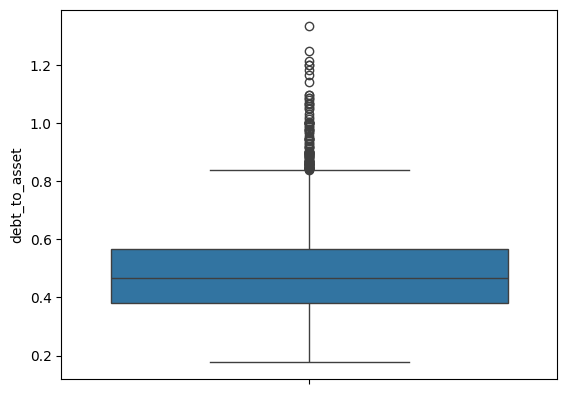

In [ ]:
sns.boxplot(df['debt_to_asset'])
plt.show()

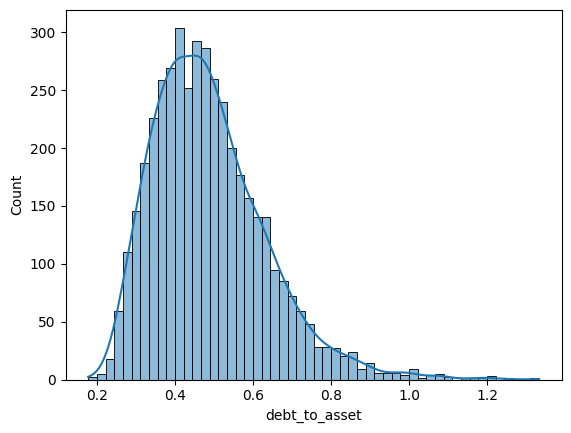

In [ ]:
sns.histplot(df['debt_to_asset'],kde=True)
plt.show()

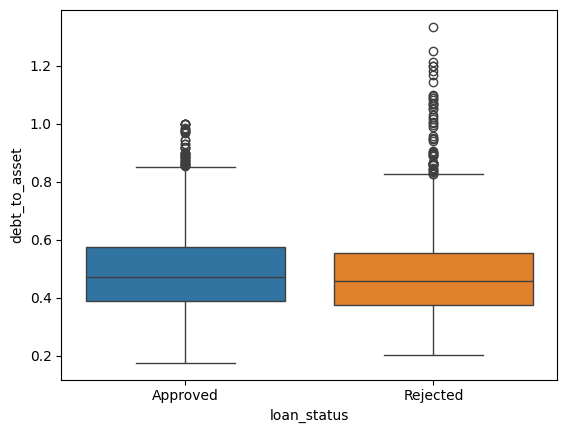

In [ ]:
sns.boxplot(y=df['debt_to_asset'],x=df['loan_status'],hue=df['loan_status'])
plt.show()

In [ ]:
model = ols('debt_to_income ~ C(loan_status)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(loan_status),1.0,11.297981,11.297981,29.704101,5.315386e-08
Residual,4287.0,1630.564215,0.380351,NaN,NaN


In [ ]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['loan_status'].unique():
  group_data=df[df['loan_status']==status]['debt_to_asset']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for Approved: p-value = 6.783588438878112e-24
Normality Test for Rejected: p-value = 1.1045567153138392e-29


In [ ]:
df['t_rat']=np.log(df['debt_to_asset'])

In [ ]:
# Assumption checking for ANOVA
# Normality between all classes
for status in df['loan_status'].unique():
  group_data=df[df['loan_status']==status]['t_rat']
  stat, p= shapiro(group_data)
  print(f"Normality Test for {status}: p-value = {p}")

Normality Test for Approved: p-value = 0.005309391977818751
Normality Test for Rejected: p-value = 4.7663992747199573e-07


In [ ]:
df.drop(columns=['t_rat'],inplace=True)

In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['debt_to_asset'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.0007168931479954605


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4289 entries, 0 to 4288
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   no_of_dependents          4289 non-null   float64
 1   education                 4289 non-null   object 
 2   self_employed             4289 non-null   object 
 3   income_annum              4289 non-null   float64
 4   loan_amount               4289 non-null   float64
 5   loan_term                 4289 non-null   float64
 6   cibil_score               4289 non-null   float64
 7   residential_assets_value  4289 non-null   float64
 8   commercial_assets_value   4289 non-null   float64
 9   luxury_assets_value       4289 non-null   float64
 10  bank_asset_value          4289 non-null   float64
 11  loan_status               4289 non-null   object 
 12  debt_to_income            4289 non-null   float64
 13  assets                    4289 non-null   float64
 14  debt_to_

In [ ]:
df.drop(columns=['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4289 entries, 0 to 4288
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no_of_dependents  4289 non-null   float64
 1   education         4289 non-null   object 
 2   self_employed     4289 non-null   object 
 3   income_annum      4289 non-null   float64
 4   loan_amount       4289 non-null   float64
 5   loan_term         4289 non-null   float64
 6   cibil_score       4289 non-null   float64
 7   loan_status       4289 non-null   object 
 8   debt_to_income    4289 non-null   float64
 9   assets            4289 non-null   float64
 10  debt_to_asset     4289 non-null   float64
dtypes: float64(8), object(3)
memory usage: 368.7+ KB


In [ ]:
df.corr(numeric_only=True)

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,debt_to_income,assets,debt_to_asset
no_of_dependents,1.000000,0.010728,0.000443,-0.024068,-0.012012,-0.018463,0.008985,-0.018850
income_annum,0.010728,1.000000,0.928295,0.001180,-0.028551,0.048366,0.932619,-0.039789
loan_amount,0.000443,0.928295,1.000000,-0.002375,-0.022956,0.356246,0.868700,0.171440
loan_term,-0.024068,0.001180,-0.002375,1.000000,0.013075,-0.029688,-0.000639,0.010442
cibil_score,-0.012012,-0.028551,-0.022956,0.013075,1.000000,-0.012339,-0.029264,0.000655
debt_to_income,-0.018463,0.048366,0.356246,-0.029688,-0.012339,1.000000,0.054787,0.635505
assets,0.008985,0.932619,0.868700,-0.000639,-0.029264,0.054787,1.000000,-0.247302
debt_to_asset,-0.018850,-0.039789,0.171440,0.010442,0.000655,0.635505,-0.247302,1.000000


In [ ]:
df.drop(columns=['assets','income_annum'],inplace=True)

In [ ]:
df.corr(numeric_only=True)

,no_of_dependents,loan_amount,loan_term,cibil_score,debt_to_income,debt_to_asset
no_of_dependents,1.000000,0.000443,-0.024068,-0.012012,-0.018463,-0.018850
loan_amount,0.000443,1.000000,-0.002375,-0.022956,0.356246,0.171440
loan_term,-0.024068,-0.002375,1.000000,0.013075,-0.029688,0.010442
cibil_score,-0.012012,-0.022956,0.013075,1.000000,-0.012339,0.000655
debt_to_income,-0.018463,0.356246,-0.029688,-0.012339,1.000000,0.635505
debt_to_asset,-0.018850,0.171440,0.010442,0.000655,0.635505,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4289 entries, 0 to 4288
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no_of_dependents  4289 non-null   float64
 1   education         4289 non-null   object 
 2   self_employed     4289 non-null   object 
 3   loan_amount       4289 non-null   float64
 4   loan_term         4289 non-null   float64
 5   cibil_score       4289 non-null   float64
 6   loan_status       4289 non-null   object 
 7   debt_to_income    4289 non-null   float64
 8   debt_to_asset     4289 non-null   float64
dtypes: float64(6), object(3)
memory usage: 301.7+ KB


In [ ]:
backupdf=df.copy()

In [ ]:
oh1=OneHotEncoder(drop='first',sparse_output=False)
oh2=OneHotEncoder(drop='first',sparse_output=False)

In [ ]:
df['education']=oh1.fit_transform(df['education'].values.reshape(-1,1))

In [ ]:
df.head()

,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,loan_status,debt_to_income,debt_to_asset
0,2.0,0.0,No,29900000.0,12.0,778.0,Approved,3.114583,0.589744
1,0.0,1.0,Yes,12200000.0,8.0,417.0,Rejected,2.975610,0.717647
2,3.0,0.0,No,29700000.0,20.0,506.0,Rejected,3.263736,0.514731
3,3.0,0.0,No,30700000.0,8.0,467.0,Rejected,3.743902,0.582543
4,5.0,1.0,Yes,24200000.0,20.0,382.0,Rejected,2.469388,0.440000


In [ ]:
oh1.categories_

[array(['Graduate', 'Not Graduate'], dtype=object)]

In [ ]:
df['self_employed']=oh2.fit_transform(df['education'].values.reshape(-1,1))

In [ ]:
df.head()

,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,loan_status,debt_to_income,debt_to_asset
0,2.0,0.0,0.0,29900000.0,12.0,778.0,Approved,3.114583,0.589744
1,0.0,1.0,1.0,12200000.0,8.0,417.0,Rejected,2.975610,0.717647
2,3.0,0.0,0.0,29700000.0,20.0,506.0,Rejected,3.263736,0.514731
3,3.0,0.0,0.0,30700000.0,8.0,467.0,Rejected,3.743902,0.582543
4,5.0,1.0,1.0,24200000.0,20.0,382.0,Rejected,2.469388,0.440000


Dependents to loan amount

In [ ]:
df['dependents_to_loan_amount'] = df['no_of_dependents'] / df['loan_amount']

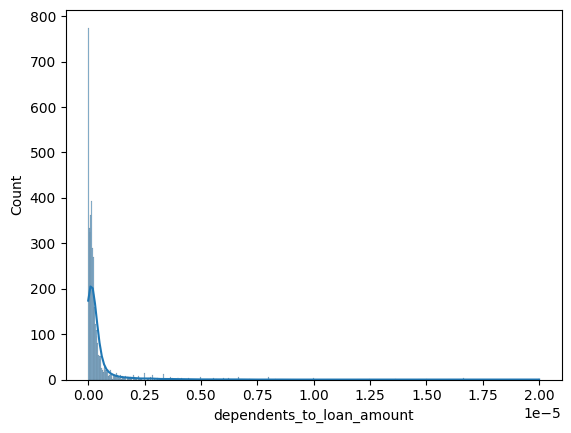

In [ ]:
sns.histplot(df['dependents_to_loan_amount'],kde=True)
plt.show()

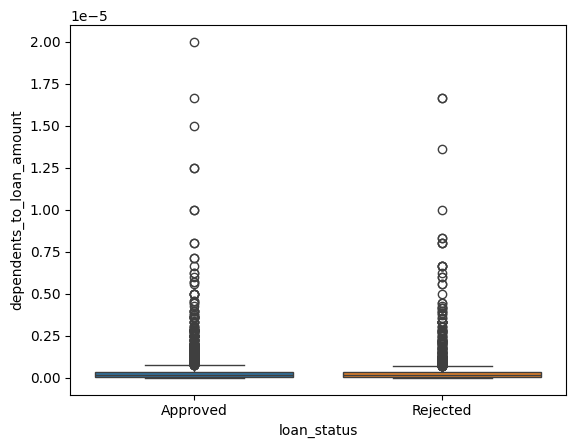

In [ ]:
sns.boxplot(y=df['dependents_to_loan_amount'],x=df['loan_status'],hue=df['loan_status'])
plt.show()

In [ ]:
model = ols('dependents_to_loan_amount ~ C(loan_status)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(loan_status),1.0,8.782067e-13,8.782067e-13,0.803693,0.370042
Residual,4287.0,4.684467e-09,1.092714e-12,NaN,NaN


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['dependents_to_loan_amount'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.42381034421609765


In [ ]:
df.drop(columns=['dependents_to_loan_amount'],inplace=True)

Education and loan amount interaction

In [ ]:
df['education_loan_interaction'] = df['education'] * df['loan_amount']

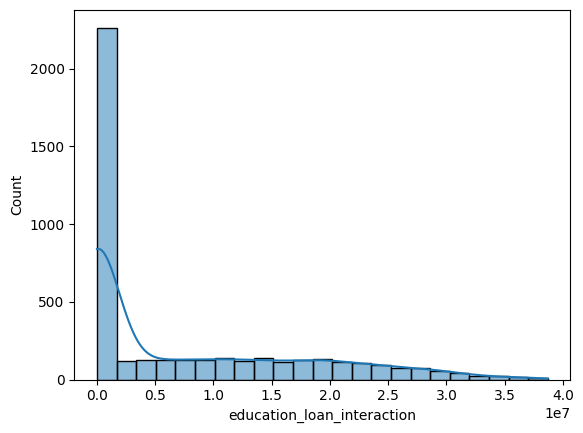

In [ ]:
sns.histplot(df['education_loan_interaction'],kde=True)
plt.show()

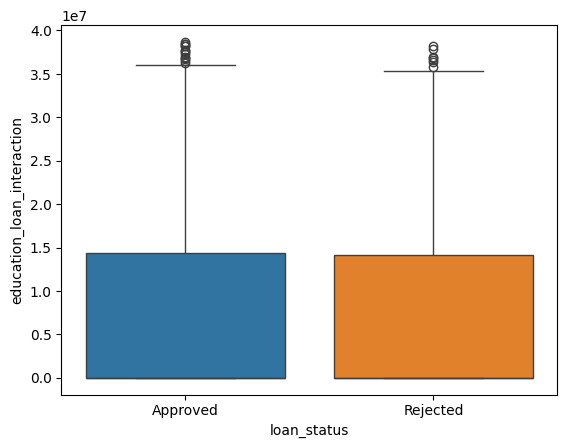

In [ ]:
sns.boxplot(y=df['education_loan_interaction'],x=df['loan_status'],hue=df['loan_status'])
plt.show()

In [ ]:
model = ols('education_loan_interaction ~ C(loan_status)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(loan_status),1.0,4.535641e+13,4.535641e+13,0.468714,0.493616
Residual,4287.0,4.148436e+17,9.676781e+13,NaN,NaN


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['education_loan_interaction'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.8779313929570842


In [ ]:
df.drop(columns=['education_loan_interaction'],inplace=True)

Self-Employed and Debt-to-Income Interaction

In [ ]:
df['self_employed_debt_to_income'] = df['self_employed'] * df['debt_to_income']

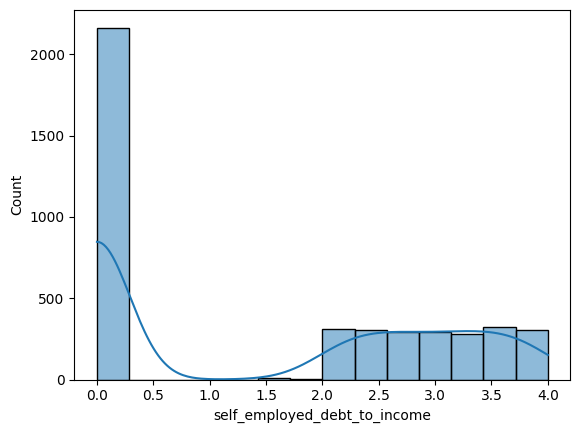

In [ ]:
sns.histplot(df['self_employed_debt_to_income'],kde=True)
plt.show()

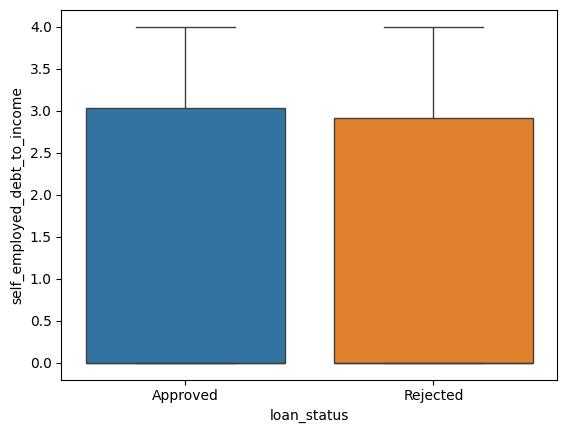

In [ ]:
sns.boxplot(y=df['self_employed_debt_to_income'],x=df['loan_status'],hue=df['loan_status'])
plt.show()

In [ ]:
model = ols('self_employed_debt_to_income ~ C(loan_status)', data=df).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(loan_status),1.0,1.230132,1.230132,0.511247,0.474638
Residual,4287.0,10315.128005,2.406141,NaN,NaN


In [ ]:
# Since data is not normal, we will try the non-parametric method
#Kruskal wallis test
grouped = [df[df['loan_status'] == status]['self_employed_debt_to_income'] for status in df['loan_status'].unique()]
stat, p_value = kruskal(*grouped)
print(f"Kruskal-Wallis Test: p-value = {p_value}")

Kruskal-Wallis Test: p-value = 0.2667621840395612


In [ ]:
df.drop(columns=['self_employed_debt_to_income'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4289 entries, 0 to 4288
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   no_of_dependents  4289 non-null   float64
 1   education         4289 non-null   float64
 2   self_employed     4289 non-null   float64
 3   loan_amount       4289 non-null   float64
 4   loan_term         4289 non-null   float64
 5   cibil_score       4289 non-null   float64
 6   loan_status       4289 non-null   object 
 7   debt_to_income    4289 non-null   float64
 8   debt_to_asset     4289 non-null   float64
dtypes: float64(8), object(1)
memory usage: 301.7+ KB


In [ ]:
df=backupdf.copy()

# Model Selection

# Logistic Regression

In [ ]:
X=df.drop(columns=['loan_status'])
Y=df['loan_status']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=2)
xtrain.shape, xtest.shape

((3002, 8), (1287, 8))

In [ ]:
X.head()

,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,debt_to_income,debt_to_asset
0,2.0,Graduate,No,29900000.0,12.0,778.0,3.114583,0.589744
1,0.0,Not Graduate,Yes,12200000.0,8.0,417.0,2.975610,0.717647
2,3.0,Graduate,No,29700000.0,20.0,506.0,3.263736,0.514731
3,3.0,Graduate,No,30700000.0,8.0,467.0,3.743902,0.582543
4,5.0,Not Graduate,Yes,24200000.0,20.0,382.0,2.469388,0.440000


In [ ]:
transform=ColumnTransformer([
    ('sc',StandardScaler(),['no_of_dependents','loan_amount','loan_term','cibil_score','debt_to_income','debt_to_asset']),
    ('ohe',OneHotEncoder(drop='first',sparse_output=False),['education','self_employed'])
],remainder='passthrough')

In [ ]:
xtrain1=pd.DataFrame(transform.fit_transform(xtrain))
xtest1=pd.DataFrame(transform.transform(xtest))

In [ ]:
xtrain.columns

Index(['no_of_dependents', 'education', 'self_employed', 'loan_amount',
       'loan_term', 'cibil_score', 'debt_to_income', 'debt_to_asset'],
      dtype='object')

In [ ]:
transform.get_feature_names_out()

array(['sc__no_of_dependents', 'sc__loan_amount', 'sc__loan_term',
       'sc__cibil_score', 'sc__debt_to_income', 'sc__debt_to_asset',
       'ohe__education_Not Graduate', 'ohe__self_employed_Yes'],
      dtype=object)

In [ ]:
xtrain1.columns=['no_of_dependents','loan_amount','loan_term', 'cibil_score',
                 'debt_to_income', 'debt_to_asset','education', 'self_employed']
xtest1.columns=['no_of_dependents','loan_amount','loan_term', 'cibil_score',
                 'debt_to_income', 'debt_to_asset','education', 'self_employed']

In [ ]:
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
ytest=le.transform(ytest)

In [ ]:
vif_data=pd.DataFrame()
vif_data['Features']=xtrain1.columns
vif_data['VIF']=[variance_inflation_factor(xtrain1.values,i) for i in range(xtrain1.shape[1])]
vif_data.sort_values(by='VIF',ascending=False)

,Features,VIF
4,debt_to_income,1.849452
5,debt_to_asset,1.649147
6,education,1.359779
7,self_employed,1.357677
1,loan_amount,1.163463
2,loan_term,1.003872
3,cibil_score,1.001209
0,no_of_dependents,1.000747


In [ ]:
x=sm.add_constant(xtrain1)
model=sm.Logit(ytrain,x).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.213460
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:               Logit            Method:           MLE      
Dependent Variable:  y                Pseudo R-squared: 0.680    
Date:                2025-01-04 06:21 AIC:              1299.6117
No. Observations:    3002             BIC:              1353.6750
Df Model:            8                Log-Likelihood:   -640.81  
Df Residuals:        2993             LL-Null:          -2000.8  
Converged:           1.0000           LLR p-value:      0.0000   
No. Iterations:      8.0000           Scale:            1.0000   
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -1.7935   0.1437 -12.4803 0.0000 -2.0751 -1.5118
no_of_dependents -0.0022   0.0718  -0.0312 0.9751 -0.1430  0.1385
loan_amount       0.0783   0.0774   1.0117 0.3117 -0.0734  0.2299
loan_term         0.8608   0.0786  10.9575 0.0000  0.7069  1.0148
cibil_score      -4.3958   0.1774 -24.7766 0.0000 -4.7436 -4.0481
debt_to_income   -0.9700   0.0978  -9.9163 0.0000 -1.1617 -0.7783
debt_to_asset     0.4864   0.0932   5.2192 0.0000  0.3037  0.6690
education         0.1587   0.1450   1.0950 0.2735 -0.1254  0.4429
self_employed    -0.0184   0.1434  -0.1284 0.8979 -0.2995  0.2627
=================================================================

"""

In [ ]:
xtrain2=xtrain1.drop(columns=['no_of_dependents'])
x=sm.add_constant(xtrain2)
model=sm.Logit(ytrain,x).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.213460
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.680    
Date:               2025-01-04 06:21 AIC:              1297.6127
No. Observations:   3002             BIC:              1345.6690
Df Model:           7                Log-Likelihood:   -640.81  
Df Residuals:       2994             LL-Null:          -2000.8  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     8.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -1.7936   0.1436 -12.4865 0.0000 -2.0751 -1.5121
loan_amount      0.0783   0.0774   1.0118 0.3116 -0.0733  0.2299
loan_term        0.8608   0.0786  10.9578 0.0000  0.7069  1.0148
cibil_score     -4.3958   0.1774 -24.7762 0.0000 -4.7436 -4.0481
debt_to_income  -0.9701   0.0978  -9.9216 0.0000 -1.1617 -0.7784
debt_to_asset    0.4864   0.0932   5.2201 0.0000  0.3038  0.6691
education        0.1591   0.1446   1.1005 0.2711 -0.1242  0.4424
self_employed   -0.0185   0.1434  -0.1289 0.8975 -0.2995  0.2626
================================================================

"""

In [ ]:
xtrain3=xtrain2.drop(columns=['loan_amount'])
x=sm.add_constant(xtrain3)
model=sm.Logit(ytrain,x).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.213631
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.679    
Date:               2025-01-04 06:21 AIC:              1296.6383
No. Observations:   3002             BIC:              1338.6875
Df Model:           6                Log-Likelihood:   -641.32  
Df Residuals:       2995             LL-Null:          -2000.8  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     8.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -1.7836   0.1429 -12.4806 0.0000 -2.0637 -1.5035
loan_term        0.8596   0.0785  10.9556 0.0000  0.7058  1.0133
cibil_score     -4.3917   0.1771 -24.7926 0.0000 -4.7388 -4.0445
debt_to_income  -0.9347   0.0910 -10.2764 0.0000 -1.1130 -0.7564
debt_to_asset    0.4778   0.0927   5.1566 0.0000  0.2962  0.6594
education        0.1545   0.1444   1.0693 0.2849 -0.1287  0.4376
self_employed   -0.0254   0.1432  -0.1775 0.8591 -0.3060  0.2552
================================================================

"""

In [ ]:
xtrain4=xtrain3.drop(columns=['self_employed'])
x=sm.add_constant(xtrain4)
model=sm.Logit(ytrain,x).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.213636
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.679    
Date:               2025-01-04 06:21 AIC:              1294.6697
No. Observations:   3002             BIC:              1330.7119
Df Model:           5                Log-Likelihood:   -641.33  
Df Residuals:       2996             LL-Null:          -2000.8  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     8.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -1.7962   0.1242 -14.4620 0.0000 -2.0396 -1.5527
loan_term        0.8593   0.0784  10.9560 0.0000  0.7056  1.0130
cibil_score     -4.3919   0.1772 -24.7914 0.0000 -4.7391 -4.0447
debt_to_income  -0.9346   0.0909 -10.2786 0.0000 -1.1128 -0.7564
debt_to_asset    0.4773   0.0926   5.1549 0.0000  0.2958  0.6587
education        0.1536   0.1444   1.0640 0.2873 -0.1294  0.4366
================================================================

"""

In [ ]:
xtrain5=xtrain4.drop(columns=['education'])
x=sm.add_constant(xtrain5)
model=sm.Logit(ytrain,x).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.213825
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.679    
Date:               2025-01-04 06:21 AIC:              1293.8039
No. Observations:   3002             BIC:              1323.8391
Df Model:           4                Log-Likelihood:   -641.90  
Df Residuals:       2997             LL-Null:          -2000.8  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     8.0000           Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
const           -1.7171   0.0983 -17.4700 0.0000 -1.9097 -1.5244
loan_term        0.8561   0.0783  10.9324 0.0000  0.7026  1.0096
cibil_score     -4.3835   0.1766 -24.8259 0.0000 -4.7296 -4.0374
debt_to_income  -0.9226   0.0900 -10.2508 0.0000 -1.0990 -0.7462
debt_to_asset    0.4683   0.0921   5.0866 0.0000  0.2878  0.6487
================================================================

"""

In [ ]:
xtest5=xtest1.drop(columns=['education','self_employed','loan_amount','no_of_dependents'])
x=sm.add_constant(xtest5)
ypred=model.predict(x)

In [ ]:
log_odds=np.log(ypred/(1-ypred))

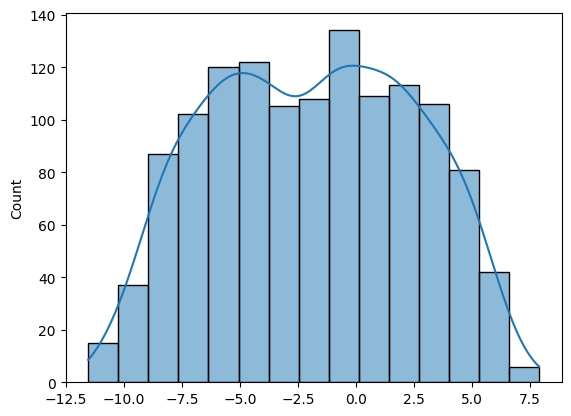

In [ ]:
sns.histplot(log_odds,kde=True)
plt.show()

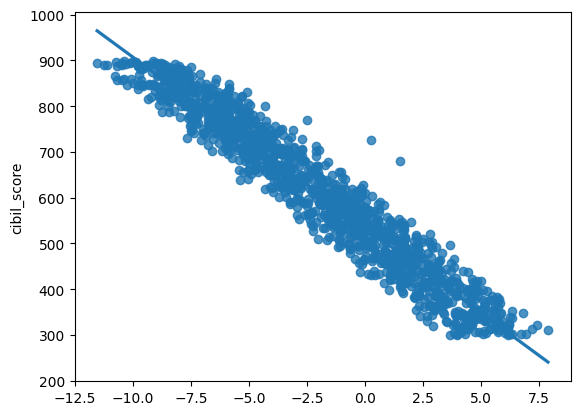

In [ ]:
sns.regplot(x=log_odds,y=xtest['cibil_score'])
plt.show()

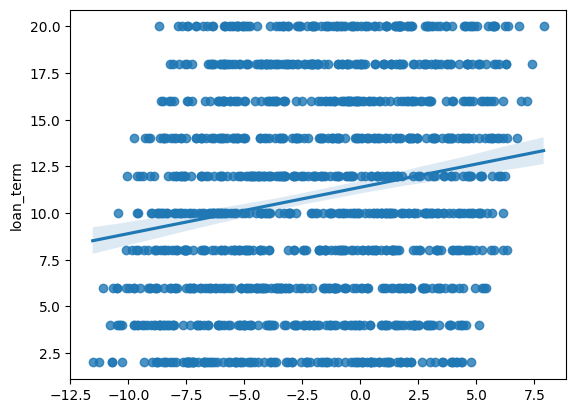

In [ ]:
sns.regplot(x=log_odds,y=xtest['loan_term'])
plt.show()

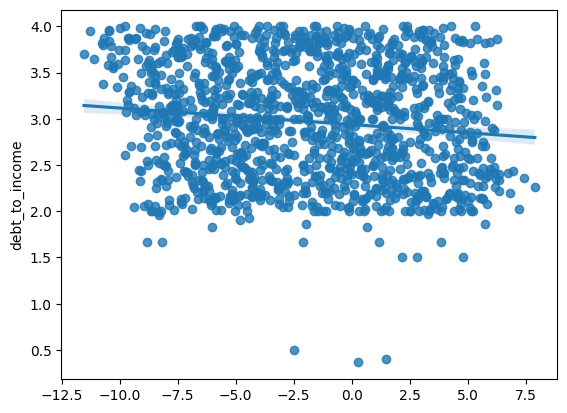

In [ ]:
sns.regplot(x=log_odds,y=xtest['debt_to_income'])
plt.show()

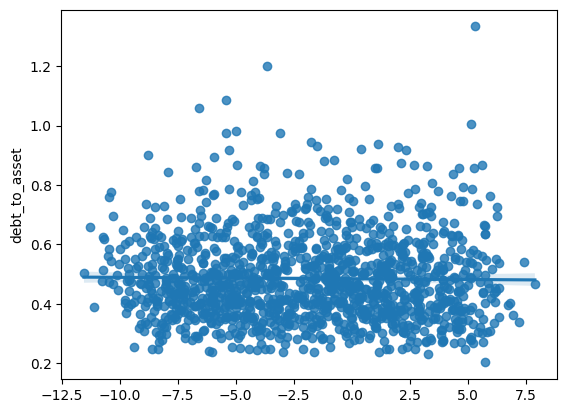

In [ ]:
sns.regplot(x=log_odds,y=xtest['debt_to_asset'])
plt.show()

In [ ]:
lr=LogisticRegression()
lr.fit(xtrain1.drop(columns=['education','self_employed','loan_amount','no_of_dependents']),ytrain)
ypred=lr.predict(xtest1.drop(columns=['education','self_employed','loan_amount','no_of_dependents']))
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))
print(roc_auc_score(ytest,ypred))

0.9090909090909091
0.8751334044823906
0.9035357397243055


In [ ]:
cross_val_score(lr,pd.DataFrame(pd.concat([xtrain1,xtest1])),pd.DataFrame(pd.concat([pd.DataFrame(ytrain),pd.DataFrame(ytest)])),cv=5,n_jobs=-1,scoring='f1').mean()

0.8820143699992256

# KNN

In [ ]:
scores=[]
for i in range(1,20):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(xtrain1,ytrain)
  ypred=knn.predict(xtest1)
  scores.append(accuracy_score(ytest,ypred))

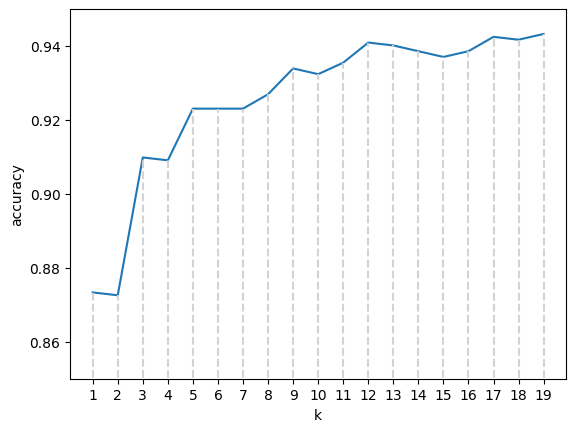

In [ ]:
plt.plot(range(1,20),scores)
plt.xlabel("k")
plt.vlines(range(1, 20), 0, scores, color='lightgrey', linestyle='--')
plt.xticks(range(1,20))
plt.ylabel("accuracy")
plt.ylim(0.85,0.95)
plt.show()

In [ ]:
max(scores)

0.9432789432789432

In [ ]:
for i in range(1,20):
  if scores[i-1]==max(scores):
    print('k=',i)
    print('max score=',scores[i-1])
    break

k= 19
max score= 0.9432789432789432


In [ ]:
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(xtrain1,ytrain)
ypred=knn.predict(xtest1)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))
print(roc_auc_score(ytest,ypred))

0.9417249417249417
0.9180327868852459
0.9337526710520803


In [ ]:
cross_val_score(knn,pd.DataFrame(pd.concat([xtrain1,xtest1])),pd.DataFrame(pd.concat([pd.DataFrame(ytrain),pd.DataFrame(ytest)])),cv=5,n_jobs=-1,scoring='f1').mean()

0.9238850025787666

# Decision Tree

In [ ]:
dt=DecisionTreeClassifier(max_depth=3,random_state=2,class_weight='balanced')
dt.fit(xtrain1,ytrain)
ypred=dt.predict(xtest1)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))

0.9992229992229992
0.9989212513484358


In [ ]:
pd.DataFrame(dt.feature_importances_,xtrain1.columns)

,0
no_of_dependents,0.000000
loan_amount,0.000000
loan_term,0.046359
cibil_score,0.853102
debt_to_income,0.083405
debt_to_asset,0.017134
education,0.000000
self_employed,0.000000


In [ ]:
cross_val_score(dt,pd.DataFrame(pd.concat([xtrain1,xtest1])),pd.DataFrame(pd.concat([pd.DataFrame(ytrain),pd.DataFrame(ytest)])),cv=5,n_jobs=-1,scoring='f1').mean()

0.9438336808608943

# Random Forest

In [ ]:
rf=RandomForestClassifier(n_estimators=60,max_depth=2,random_state=2)
rf.fit(xtrain1,ytrain)
ypred=rf.predict(xtest1)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))

0.9945609945609946
0.992399565689468


In [ ]:
pd.DataFrame(rf.feature_importances_,xtrain1.columns)

,0
no_of_dependents,0.007946
loan_amount,0.045943
loan_term,0.252444
cibil_score,0.483988
debt_to_income,0.118533
debt_to_asset,0.081618
education,0.004169
self_employed,0.005359


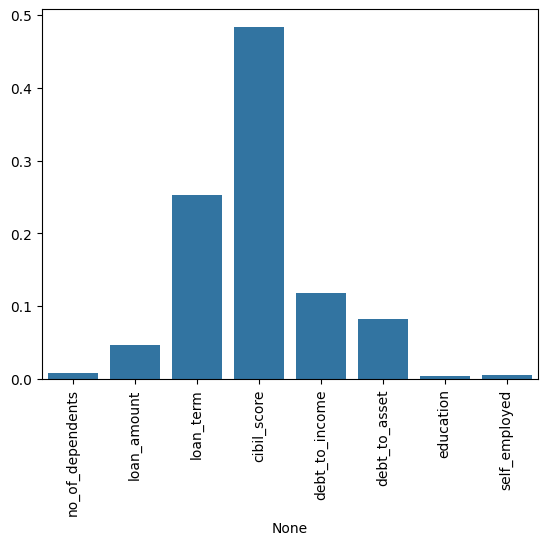

In [ ]:
sns.barplot(y=rf.feature_importances_,x=xtrain1.columns)
plt.xticks(rotation=90)
plt.show()

In [ ]:
cross_val_score(rf,pd.DataFrame(pd.concat([xtrain1,xtest1])),pd.DataFrame(pd.concat([pd.DataFrame(ytrain),pd.DataFrame(ytest)])),cv=5,n_jobs=-1,scoring='f1').mean()

0.9813180777801126

#SVC

In [ ]:
svc=SVC(class_weight='balanced', kernel='rbf',C=100,gamma=0.1)
svc.fit(xtrain1,ytrain)
ypred=svc.predict(xtest1)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))

0.9735819735819736
0.9633620689655172


In [ ]:
cross_val_score(svc,pd.DataFrame(pd.concat([xtrain1,xtest1])),pd.DataFrame(pd.concat([pd.DataFrame(ytrain),pd.DataFrame(ytest)])),cv=5,n_jobs=-1,scoring='f1').mean()

0.963288540199429

#Naive- Bayes

In [ ]:
nb=GaussianNB()
nb.fit(xtrain1,ytrain)
ypred=nb.predict(xtest1)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))

0.9316239316239316
0.9067796610169492


In [ ]:
cross_val_score(nb,pd.DataFrame(pd.concat([xtrain1,xtest1])),pd.DataFrame(pd.concat([pd.DataFrame(ytrain),pd.DataFrame(ytest)])),cv=5,n_jobs=-1,scoring='f1').mean()

0.9137019601308947

#XGBoost

In [ ]:
xgb=XGBClassifier(random_state=2,n_estimators=10, learning_rate=0.1,max_depth=2)
xgb.fit(xtrain1,ytrain)
ypred=xgb.predict(xtest1)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))

0.9611499611499611
0.9430523917995444


#Adaboost

In [ ]:
ab=AdaBoostClassifier(n_estimators=50,random_state=2,learning_rate=0.01)
ab.fit(xtrain1,ytrain)
ypred=ab.predict(xtest1)
print(accuracy_score(ytest,ypred))
print(f1_score(ytest,ypred))

0.9518259518259519
0.9368635437881874


#Voting Classifier

In [ ]:
vc=VotingClassifier(estimators=[('dt',dt),('rf',rf),('ab',ab),('svc',svc)],voting='hard')
vc.fit(xtrain1,ytrain)
ypred=vc.predict(xtest1)
print(f1_score(ytest,ypred))

0.9870967741935484


#Stacking Classifier